In [1]:
from fastai.vision import *

In [2]:
folder = 'revolver'
file = 'revolver.txt'

In [8]:
folder = 'glock'
file = 'glock.txt'

In [13]:
folder = 'desert_eagle'
file = 'desert_eagle.txt'

In [14]:
path = Path('data/guns')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/guns/revolver'),
 PosixPath('data/guns/glock'),
 PosixPath('data/guns/desert_eagle'),
 PosixPath('data/guns/.ipynb_checkpoints'),
 PosixPath('data/guns/desert_eagle.txt'),
 PosixPath('data/guns/glock.txt'),
 PosixPath('data/guns/revolver.txt')]

In [5]:
classes = ['revolver','glock','desert_eagle']

In [15]:
download_images(path/file, dest, max_pics=200)


 Download of https://www.turners.com/prodimages/8297-DEFAULT-l.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /storage
$ cd /storage
$ wget -c https://www.turners.com/prodimages/8297-DEFAULT-l.jpg
$ tar -zxvf 8297-DEFAULT-l.jpg

And re-run your code once the download is successful

Error https://www.thefirearmblog.com/blog/wp-content/uploads/2017/01/Desert-Eagle-Mark-XIX-6-inch-Component-System.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fca1b413f98>: Failed to establish a new connection: [Errno 111] Connection refused',))
Error http://files.harrispublications.com/wp-content/uploads/sites/6/2015/12/magnum-research-Desert-Eagle-1911-GSS-9.jpg HTTPConnectionPool(host='files.harrispublications.com', port=80): Max retries exceeded with url: /wp-content/uploads/sites/6/2015/12/magnum-research-Desert-Eagle-1911-GSS-9.jpg (Caused by NewConnectionError(

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

KeyboardInterrupt: 

Then we can remove any images that can't be opened:

In [16]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

revolver


glock


desert_eagle


cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000081.jpg'>
Image data/guns/desert_eagle/00000155.jpg has 4 instead of 3 channels


/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000052.jpeg'>


/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/guns/desert_eagle/00000192.jpg'>


## View data

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [19]:
data.classes

['desert_eagle', 'glock', 'revolver']

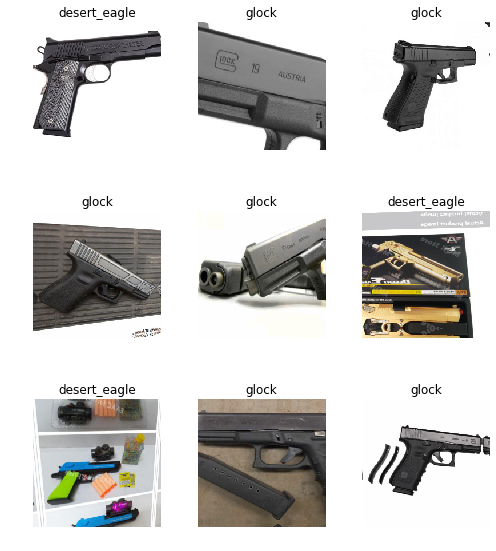

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['desert_eagle', 'glock', 'revolver'], 3, 432, 108)

## Train model

In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.350005,0.631898,0.240741
2,0.908204,0.340466,0.101852
3,0.701807,0.264429,0.083333
4,0.574401,0.258890,0.083333


In [24]:
learn.save('stage-1')

In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


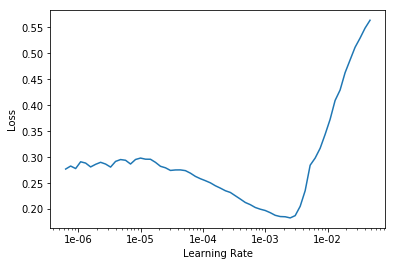

In [27]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.186435,0.218808,0.055556
2,0.134401,0.185738,0.064815


In [30]:
learn.save('stage-2')

## Interpretation

In [31]:
learn.load('stage-2');

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

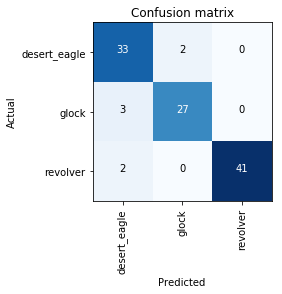

In [33]:
interp.plot_confusion_matrix()

In [35]:
from fastai.widgets import *

In [36]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [38]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [39]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [41]:
ImageCleaner(ds, idxs,path,duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img